# Descargar dataset y vista general

In [ ]:
# Libraries to handle data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import io
from sklearn.utils import shuffle

## Descarga del fichero de datos bookings.csv
# El fichero puede descargarse directamente de la fuente proporcionada, o se
# puede utilizar el siguiente código para descargarlo de google drive:
# URL: https://drive.google.com/file/d/17vZTCW9dAyRuQZDkyh2UI1QHSUKLWcOR
!gdown --id 17vZTCW9dAyRuQZDkyh2UI1QHSUKLWcOR

## Carga del fichero en Python
df_train = pd.read_csv('bookings.csv', delimiter=',')

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=17vZTCW9dAyRuQZDkyh2UI1QHSUKLWcOR
To: /content/bookings.csv
100% 16.9M/16.9M [00:00<00:00, 63.2MB/s]


Ahora, preparamos los datos para construir nuestro modelo. Lo primero que tenemos que hacer es visualizar los datos y realizar las transformaciones pertinentes en base a un estudio previo del dataset.

In [ ]:
df_train.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Resample

Antes de comenzar a procesar los datos de entrenamiento, veamos si los datos están o no balanceados. Esto es realmente importante, dado que si hay un número considerable de una salida frente a otra, el resultado de la predicción probablemente será erróneo.

In [ ]:
print(f"Numero de occurrencias NO cancelado: {len(df_train[df_train.is_canceled==0])}")
print(f"Numero de occurrencias SI cancelado: {len(df_train[df_train.is_canceled==1])}")

Numero de occurrencias NO cancelado: 75166
Numero de occurrencias SI cancelado: 44224


Class 0: 75166
Class 1: 44224
Proportion: 1.7 : 1


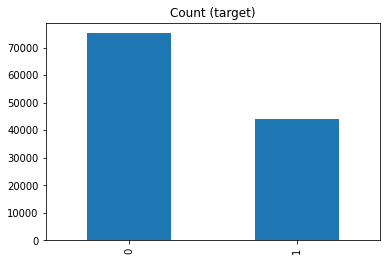

In [ ]:
target_count = df_train['is_canceled'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

Una de las formas de hacer resampling es eliminar ocurrencias de la clase que más tenga.

In [ ]:
from sklearn.utils import resample

# Split data into two dataframes because data is not balanced
df_majority = df_train[df_train.is_canceled==0] #cuando el tren SI es cancelado
df_minority = df_train[df_train.is_canceled==1] #cuando el tren NO es cancelado

df_majority_downsampled = resample(df_majority, 
                                 n_samples=len(df_minority),
                                 replace=True,      # sample with replacement
                                 random_state=42)   # reproducible results

# Combino la clase minoritaria con el resultado del resampling
df_train = pd.concat([df_minority, df_majority_downsampled])

# Compruebo el resultado
print(f"Numero de occurrencias NO cancelado: {len(df_train[df_train.is_canceled==0])}")
print(f"Numero de occurrencias SI cancelado: {len(df_train[df_train.is_canceled==1])}")

Numero de occurrencias NO cancelado: 44224
Numero de occurrencias SI cancelado: 44224


Una de las formas de hacer resampling es añadir ocurrencias a la clase que menos tenga.

In [ ]:
## Carga del fichero en Python
df_train = pd.read_csv('bookings.csv', delimiter=',')

In [ ]:
from sklearn.utils import resample

# Split data into two dataframes because data is not balanced
df_majority = df_train[df_train.is_canceled==0]
df_minority = df_train[df_train.is_canceled==1]


# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 n_samples=len(df_majority),
                                 replace=True,     # sample with replacement
                                 random_state=42) # reproducible results


# Combine majority class with upsampled minority class
df_train = pd.concat([df_majority, df_minority_upsampled])


# Compruebo el resultado
print(f"Numero de occurrencias NO cancelado: {len(df_train[df_train.is_canceled==0])}")
print(f"Numero de occurrencias SI cancelado: {len(df_train[df_train.is_canceled==1])}")

Numero de occurrencias NO cancelado: 75166
Numero de occurrencias SI cancelado: 75166


# Tareas de manipulación de datos

## Normalización

Normalizamos los datos a partir de los coeficientes mínimo y máximo de la colección de entrenamiento.

In [ ]:
df_train = pd.read_csv('bookings.csv', delimiter=',')
df_train['lead_time'].describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#normalización de una columna concreta
scaler = MinMaxScaler()                                             #se normalizará al rango [0,1]
data_normalized = scaler.fit_transform(df_train[['lead_time']])     #el array contendrá las columnas a normalizar
df_train['lead_time'] = data_normalized
df_train['lead_time'].describe()

count    119390.000000
mean          0.141128
std           0.144997
min           0.000000
25%           0.024423
50%           0.093623
75%           0.217096
max           1.000000
Name: lead_time, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#si quiero normalizar un dataset completo
scaler = MinMaxScaler()                                                 #se normalizará al rango [0,1]
data_normalized = scaler.fit_transform(df_train)                        #has tenido que transformar antes las variables categóricas a numéricas
df_train = pd.DataFrame(data_normalized, columns= df_train.columns)



In [ ]:
df_train.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,0.141128,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,0.144997,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,0.024423,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,0.093623,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,0.217096,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,1.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Clasificar

In [ ]:
min_value= df_train['lead_time'].min()
max_value= df_train['lead_time'].max()

labels = ['G1', 'G2', 'G3']
bins = np.linspace(min_value,max_value,4)

df_train['lead_time_classification'] = pd.cut(df_train['lead_time'], bins=bins, labels=labels, include_lowest=True)

## Transformar variables categóricas en numéricas

In [ ]:
## Carga del fichero en Python
df_train = pd.read_csv('bookings.csv', delimiter=',')

valores_hotel = df_train['hotel'].unique() #muestro un array con los diferentes valores que tiene hotel
print(valores_hotel)

['Resort Hotel' 'City Hotel']


In [ ]:
#con esta función puedo convertir en numérica una columna categórica
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column) #obtengo como dataframe la conversión a numéricas
    #print(dummies.head())  #en caso de que quieras ver lo que se genera

    df = pd.concat([df, dummies], axis=1) #concateno lo obtenido al anterior dataframe
    df = df.drop(column, axis=1)          #elimino la columna categórica
    return df
    

df_train = onehot_encode(df_train, column='hotel')
df_train.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,hotel_City Hotel,hotel_Resort Hotel
0,0,342,2015,July,27,1,0,0,2,0.0,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,1
1,0,737,2015,July,27,1,0,0,2,0.0,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,1
2,0,7,2015,July,27,1,0,1,1,0.0,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,1
3,0,13,2015,July,27,1,0,1,1,0.0,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,1
4,0,14,2015,July,27,1,0,2,2,0.0,...,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,0,1


## Identificar columnas con muchos valores nulos


In [ ]:
def print_percentage_null_values(df):
    cols_with_missing = df.isnull().sum()
    print(cols_with_missing[cols_with_missing > 0]/len(df)*100)

print_percentage_null_values(df_train)

children     0.004522
country      0.377623
agent       12.839182
company     94.932616
dtype: float64


## Completar valores NaN con un valor específico

Es importante destacar dos atributos: method y value. Comenzaremos por la explicación de method, el cual puede tener los siguientes valores:

*   pad or ffill. Utiliza la última observación válida. 
*   backfill or bfill. Utiliza la anterior observacion válida. 


In [ ]:
df_train.fillna(method="pad", inplace=True)

Si en values incluimos un diccionario, podemos indicar por cada columna el valor con el que queremos completar los valores NaN. 

In [ ]:
values = {"lead_time": 10, "stays_in_weekend_nights": 0}
df_train.fillna(value=values)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10728,Resort Hotel,1,113,2017,March,13,29,0,4,2,...,No Deposit,6.0,331.0,0,Transient,37.5,0,0,Canceled,2016-12-07
61033,City Hotel,1,8,2016,November,49,30,0,3,2,...,No Deposit,9.0,331.0,0,Transient,114.0,0,0,Canceled,2016-11-23
57872,City Hotel,1,25,2016,October,41,2,2,1,2,...,No Deposit,9.0,331.0,0,Transient,133.0,0,1,Canceled,2016-09-08
73858,City Hotel,1,314,2015,August,35,27,0,2,2,...,No Deposit,1.0,331.0,0,Transient-Party,62.8,0,0,Canceled,2014-10-17


## Aplicar un filtro

In [ ]:
#Elimino aquellas ocurrencias que children, adults y babies son 0 al mismo tiempo. 
filter = (df_train['children'] == 0) & (df_train['adults'] == 0) & (df_train['babies'] == 0)
df_train = df_train[~filter]

## Crear una nueva columna como combinación de otras

In [ ]:
  #La columna nueva se llamará total_nights y será la suma de stays_in_weekend_nights y stays_in_week_nights
  df_train['total_nights'] = df_train['stays_in_weekend_nights']+df_train['stays_in_week_nights']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Eliminar una columna

In [ ]:
df_train.drop("stays_in_week_nights", axis = 1, inplace = True)
df_train.drop("stays_in_weekend_nights", axis = 1, inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Identificar variables categoricas y numéricas

In [ ]:
#se busca aquellas cuyo dtypes sea object, esas serán las variables categóricas
categorical = list(df_train.dtypes[df_train.dtypes == 'object'].index)
numerical = list(df_train.dtypes[df_train.dtypes != 'object'].index)

print("Variables categoricas", categorical)
print("Variables NO categoricas", numerical)

Variables categoricas ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']
Variables NO categoricas ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'total_nights']
